In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# EDA

<Axes: xlabel='class', ylabel='count'>

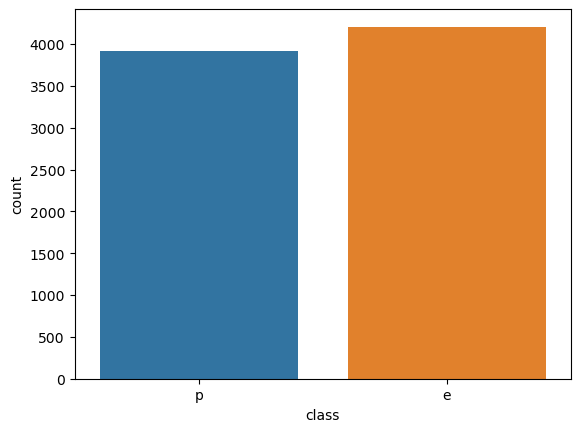

In [9]:
sns.countplot(data=df,x='class')

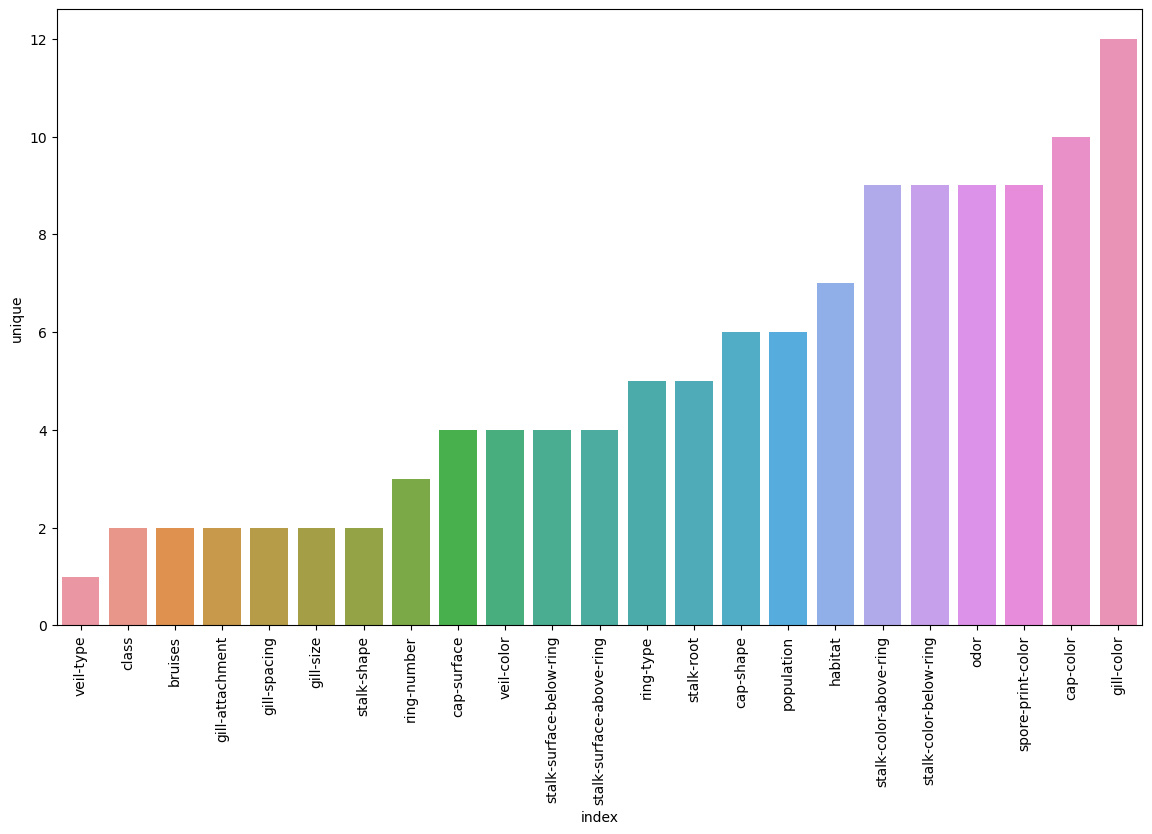

In [15]:
des = df.describe().transpose().reset_index().sort_values('unique')
plt.figure(figsize = (14,8))
sns.barplot(data=des,x='index',y='unique')
plt.xticks(rotation=90);

In [42]:
X = df.drop('class',axis =1)
y = df['class']

In [50]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [51]:
X = pd.get_dummies(X, drop_first=True)

In [52]:
X.shape

(8124, 95)

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=50)

# Modeling

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada_mod = AdaBoostClassifier(n_estimators=1)

In [56]:
ada_mod.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [57]:
ada_pred = ada_mod.predict(X_test)

In [58]:
ada_pred

array(['e', 'p', 'e', ..., 'p', 'e', 'p'], dtype=object)

# Performace Evaluation

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [60]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           e       0.95      0.82      0.88       603
           p       0.84      0.95      0.90       616

    accuracy                           0.89      1219
   macro avg       0.90      0.89      0.89      1219
weighted avg       0.90      0.89      0.89      1219



In [61]:
ada_mod.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
ada_mod.feature_importances_.argmax()

22

In [63]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

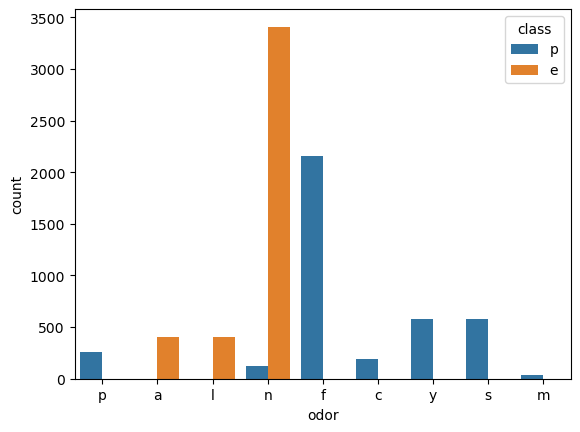

In [64]:
sns.countplot(data=df, x= 'odor',hue='class')

In [65]:
len(X.columns)

95

# Analyzing performance as more weak learners comes into the model

In [67]:
error_rate = []
for n in range(1,96):
    adamod = AdaBoostClassifier(n_estimators=n)
    adamod.fit(X_train,y_train)
    adapred = adamod.predict(X_test)
    err = 1-accuracy_score(y_test,adapred)
    error_rate.append(err)

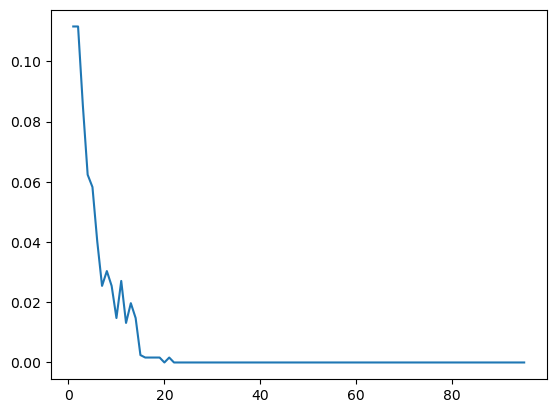

In [68]:
plt.plot(range(1,96),error_rate)

In [70]:
adamod.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.02105263, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.02105263, 0.03157895, 0.03157895,
       0.        , 0.        , 0.05263158, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.08421053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.01052632, 0.        , 0.        , 0.01052632,
       0.03157895, 0.        , 0.        , 0.01052632, 0.        ,
       0.04210526, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08421053, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03157895, 0.01052632, 0.        , 0.     

In [74]:
df1 = pd.DataFrame(index=X.columns,data=adamod.feature_importances_,columns=['Importance'])
df1[df1['Importance']>0].sort_values('Importance')

,Importance
cap-color_c,0.010526
spore-print-color_u,0.010526
spore-print-color_n,0.010526
spore-print-color_k,0.010526
ring-type_p,0.010526
ring-type_f,0.010526
habitat_l,0.010526
stalk-root_r,0.010526
stalk-root_b,0.010526
stalk-surface-below-ring_k,0.010526
